To Learn more about dataset-
*https://github.com/HoaNP/NSL-KDD-DataSet*

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

In [2]:
train = pd.read_csv("../data/KDDTrain.txt", header=None)
test  = pd.read_csv("../data/KDDTest.txt", header=None)

#### Common Pre-Processing

In [3]:
feature_names = [
 'duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
 'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
 'root_shell','su_attempted','num_root','num_file_creations','num_shells',
 'num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count',
 'srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
 'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
 'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
 'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
]

cols = feature_names + ['label', 'difficulty']

train = pd.read_csv('../data/KDDTrain.txt', names=cols)
test  = pd.read_csv('../data/KDDTest.txt',  names=cols)

In [4]:
train.drop('difficulty', inplace=True, axis=1)
test.drop('difficulty', inplace=True, axis=1)

In [5]:
train['binary_label'] = train['label'].apply(lambda x: 0 if x.strip()=='normal' else 1)
test['binary_label']  = test['label'].apply(lambda x: 0 if x.strip()=='normal' else 1)

In [6]:
train.drop('label', inplace=True, axis=1)
test.drop('label', inplace=True, axis=1)

#### Training Data Pre-Processing

In [7]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,binary_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [9]:
train.isnull().sum()        # NO NULL values, Therefore No IMPUTATIONS required...

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
vals = train['protocol_type'].value_counts()
vals

protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64

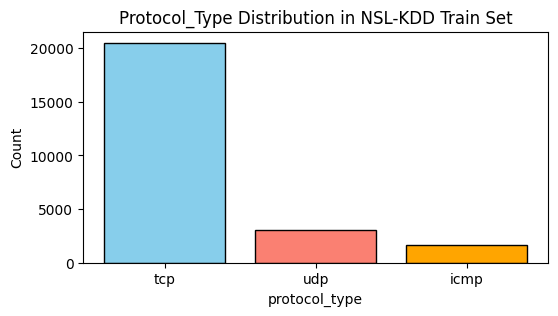

In [11]:
cat = train['protocol_type'].unique()
plt.figure(figsize=(6,3))
plt.bar(cat, vals, color=['skyblue','salmon', 'orange'], edgecolor = 'black')
plt.title('Protocol_Type Distribution in NSL-KDD Train Set')
plt.xlabel('protocol_type')
plt.ylabel('Count')
plt.show()

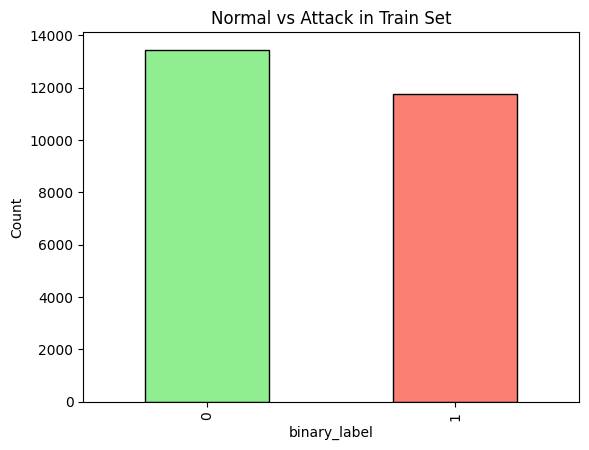

In [12]:
train['binary_label'].value_counts().plot(kind='bar', color=['lightgreen','salmon'], edgecolor = 'black')
plt.title('Normal vs Attack in Train Set')
plt.ylabel('Count')
plt.show()


##### Since your target (normal vs attack) is well balanced, the feature-level imbalance in protocol_type (tcp > udp > icmp) is not critical to fix.

Why:

- Random Forests handle categorical skew reasonably well.

- What matters most is the label balance, which is good in your case.

- You only need to be aware that tcp dominates; the model might rely slightly more on it, but for now it’s fine.

#### Test Data Pre-Processing

In [13]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,binary_label
0,13,tcp,telnet,SF,118,2425,0,0,0,0,...,10,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,1
1,0,udp,private,SF,44,0,0,0,0,0,...,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,1
2,0,tcp,telnet,S3,0,44,0,0,0,0,...,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,1
3,0,udp,private,SF,53,55,0,0,0,0,...,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,0
4,0,tcp,private,SH,0,0,0,0,0,0,...,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,1


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11850 entries, 0 to 11849
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     11850 non-null  int64  
 1   protocol_type                11850 non-null  object 
 2   service                      11850 non-null  object 
 3   flag                         11850 non-null  object 
 4   src_bytes                    11850 non-null  int64  
 5   dst_bytes                    11850 non-null  int64  
 6   land                         11850 non-null  int64  
 7   wrong_fragment               11850 non-null  int64  
 8   urgent                       11850 non-null  int64  
 9   hot                          11850 non-null  int64  
 10  num_failed_logins            11850 non-null  int64  
 11  logged_in                    11850 non-null  int64  
 12  num_compromised              11850 non-null  int64  
 13  root_shell      

In [15]:
test.isnull().sum() 

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [16]:
vals = train['protocol_type'].value_counts()
vals

protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64

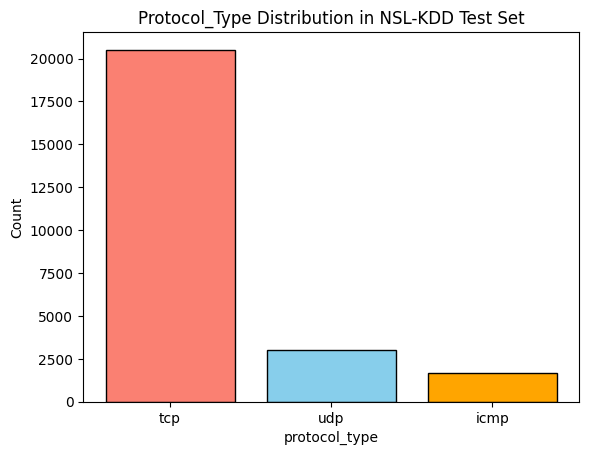

In [17]:
cat = test['protocol_type'].unique()
plt.bar(cat, vals, color=['salmon', 'skyblue', 'orange'], edgecolor = 'black')
plt.title('Protocol_Type Distribution in NSL-KDD Test Set')
plt.xlabel('protocol_type')
plt.ylabel('Count')
plt.show()

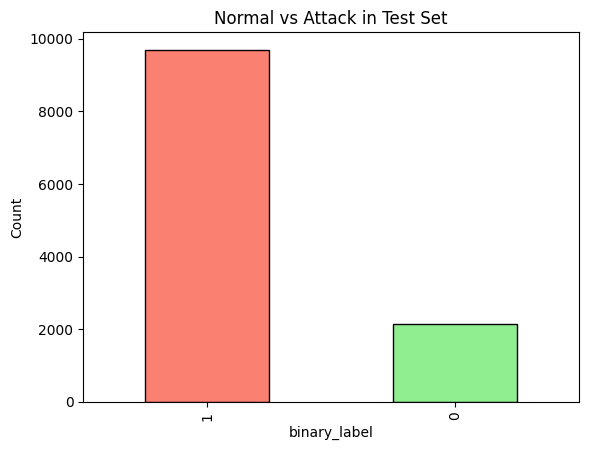

In [18]:
test['binary_label'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'], edgecolor = 'black')
plt.title('Normal vs Attack in Test Set')
plt.ylabel('Count')
plt.show()


#### EDA and Encodings

In [19]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (25192, 42)
Test shape: (11850, 42)


In [7]:
categorical_features = ['protocol_type', 'service', 'flag']
numeric_features = [col for col in train.columns if col not in categorical_features + ['binary_label']]

In [8]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numeric_features)
])

In [9]:
rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(
        n_estimators=400,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=3,
        class_weight='balanced_subsample',
        n_jobs=-1,
        random_state=42
    ))
])

In [10]:
xgb_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', xgb.XGBClassifier(
        n_estimators=400,
        max_depth=10,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=(train['binary_label'].value_counts()[0] / train['binary_label'].value_counts()[1]),
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss'
    ))
])

In [14]:
X_train = train.drop('binary_label', axis=1)
y_train = train['binary_label']

X_test = test.drop('binary_label', axis=1)
y_test = test['binary_label']

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


for name, model in [('Random Forest', rf_model), ('XGBoost', xgb_model)]:
    y_pred = model.predict(X_test)
    print(f"\n{name}:.2f*100 Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{name} Report:\n", classification_report(y_test, y_pred))



Random Forest:.2f*100 Accuracy: 0.5543459915611815
Random Forest Report:
               precision    recall  f1-score   support

           0       0.27      0.88      0.42      2152
           1       0.95      0.48      0.64      9698

    accuracy                           0.55     11850
   macro avg       0.61      0.68      0.53     11850
weighted avg       0.82      0.55      0.60     11850


XGBoost:.2f*100 Accuracy: 0.6058227848101266
XGBoost Report:
               precision    recall  f1-score   support

           0       0.30      0.87      0.45      2152
           1       0.95      0.55      0.69      9698

    accuracy                           0.61     11850
   macro avg       0.63      0.71      0.57     11850
weighted avg       0.83      0.61      0.65     11850



In [15]:
import shap

In [16]:
xgb_clf = xgb_model.named_steps['clf']

In [17]:
X_test_preprocessed = xgb_model.named_steps['preprocess'].transform(X_test)


In [18]:
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test_preprocessed)

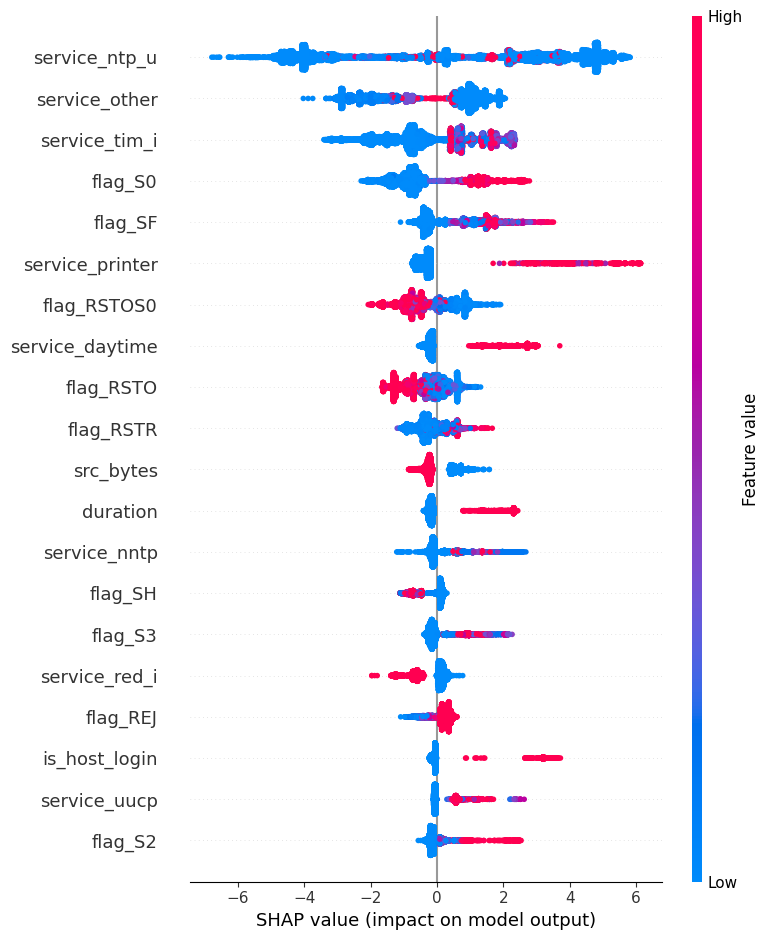

In [29]:
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=np.concatenate(
    [numeric_features, xgb_model.named_steps['preprocess'].named_transformers_['cat'].get_feature_names_out(categorical_features)]
))

In [19]:
import joblib

# Save the trained models
joblib.dump(rf_model, '../models/rf_model.pkl')
joblib.dump(xgb_model, '../models/xgb_model.pkl')

print("Models saved successfully!")

Models saved successfully!
